In [1]:
%matplotlib inline

from sklearn import (datasets,random_projection)
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from mpl_toolkits.mplot3d import Axes3D
from isomap import isomap

In [2]:

digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30


In [3]:

#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    
    if title is not None:
        plt.title(title)


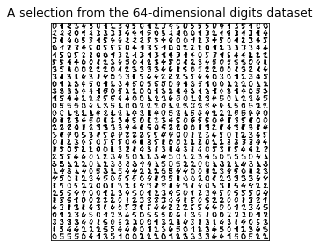

In [4]:

# Plot images of the digits
n_img_per_row = 30
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAT8AAAD7CAYAAAAcqJO9AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzsvX2UfFt6FvSeueHGucxMd7gjI0mgajmYCRPH7mVFlAh2ofkgEa3OQkXIgqogSACh6yqfglaNBMSl2BUWEZAVq25U5EOtvhi+IqT7Kl9CrlU/AkkIk1TdJNzJhFyqftxhgpcM2z/qPKff3vU8b3VPetL9qznPWmfd+6vTZ5/9+Z693/3s5y1SSlajRo0an2l4x0NnoEaNGjUeArXxq1GjxmckauNXo0aNz0jUxq9GjRqfkaiNX40aNT4jURu/GjVqfEbi0Ri/oihSURQ/89OQ7seLovhnPw3pfqAoinlRFG8VRfEb7jv9TwWfrjq8bxRF0S6K4gfdv/9WURTtB8zSDRRF8TVFUXzrT8B7JkVRfP0t/7ZZtu9nlf/+M0VRdG/57K3/9i7I8/Ss4dbGryiKq6IoVkVRfPanM0M/HpR5/JX+t5TSu1JK3/dpeN1vNrPLlNK7U0q/79OQfghW1ntO/7miKL6+KIo3SgM/K4rikPzdX/jxDoCU0hellK5+XBm+R6SU/ueU0pc/dD4ipJS+MqX08l3/tiiKXlEUf/HTm7tt5B+8x/CeWxm/oiiaZvbzzCyZ2b/9Kedsv9Aws7+lbhZF8dxPYF4+HfiwmX2Jmf0cM3uPmf0yM/tH/g+KovgaM/tJP/FZq1HjHpBS2nmZ2X9uZn/JzP5bM/uWHX/bM7PvM7O3zGxhZl/j7v0KM/suM1uZ2Z8zs4a7l8zsZ5b//9lm9t+Y2feb2cfM7A+a2Tvd33bMbG5m/8DMvtfMfoGZ/S4z+6RtBujHzez3k3QPzOybzezvmdnrZvY7zOwdLt9/sXzvqsz7V4oyflv2ri8ws4mZ/QEz+9Nm9g/N7Etv8b6/ZGbnZrYu6+xLyt9/wMx+2My64v1RWb/OzP5OmeY3mllxm/rP0v+cMt33B+18YGbfY2b/Svnezwr+9p1l/azM7DvN7DeZ2Q+6+0sz+9Ly/4dm9ifM7H8q+9B3lPX728o6+QEz+/IsH99kZh81s79rZl9vZs/dpk1N9FU85/7uS8zsr5vZ0/K/X+LuXZnZ7yzb8i0z+1Yze6+7/yfM7IfKZ/8vM/sid29iZl8v6uy5Mt8/Uubx1/l6Lt/7K93f/t7ybxdm9h+xvzWzn1X2mU+W7bsu739V2S5vlXX4Gz/FPH2tbfrXW+X9X13+/pPN7EfN7J+U7/24mX2umf1sM/srtumrHzWz329mz5fPFLYZGz9sm3H+HWb2z0f2Qb1H9stbGr+PmNmvNbOWmf1jM3uf+LufXGb0A+W/fxoa2zYG6yNlA3yWbQzBXxbG79zM/qSZ/RQze7eZ/R9m9l+W93522ZG+zDYz188zsy/MO4RI95vN7JUyzaZtBu9/4Dr8PzazX1U28q8xszfMGY8s3Rvvsk1Hfmpm/2qZr3/qFu/7sbLDPGebQfv9tjFYn21mX152onfd5v2urN9iZodm9jNsY3R/wW3qP0vnX7NNh/wtthm432Nmvy77m280s5fKcu0yfr/HzP7vsj1/upn9TYuN3z8ys68o8/nNthnQv902s8xfZWYL9+zUzP6QbfreTzWzv2bXg062qcV9tWel8SvzvLLNzPezzOyXlP9+0bXD99rGQL+z/Pfvcfn7FWX7f7aZjcxsfkvj93Vm9t1lff0UM7s0bfy+zjbG6/Nt8+H688HfVmVz7/qomf288v8/x8z+xU8xT/+mmb2/rN8TM/sE0jKztm/z8reWbT6en2WbfvRdZtYv732Fmb1mm75c2Kbf/rRb2Iet93zKxs/Mfm7Zgd5b/vu7zeylwPitzewXmZuplff+jJUDv/z3O8rKaXgjVRb0H5qbddhm6bUo//8Pmdn5HQ3Cz7RN53/bzD7o7v1qM7tyneIj7t4L5bP/zB2M3ze7f9/mfX/H3ftQ+b73ud/eNLPjO5b157p//3Ez+623qf8snV9apvVNthnQ/4JtDOmXlfe/2DYzb3TaXcbv+6w0wuW//0OLjd//6e79W7b5gmM29+7yfYdm9j4z+//s5qrgl9jGFxu2qcV9tWfXxu+Xmdlfy+7/FTPruXb4He7erzWzPyvq4bB8/4HrM8r4fZuZfZ3795ebNmjfZqXBL//9pcHfVmVzf//9tumb79lhC8I8kb+/MLOz8v/btsMomVnfzKbl///rdr2yeIf7m132Yed7cN3G59c1s29NKf1I+e8/Uv62hZTSPzSzX2ybL8RHi6L4U0VRfGF5u2Fm31AUxbooirWZ/f2yIJ+XJfNP26aTvub+9s+Wv5ttvjrfe4t853ivbWYOr7vfXs/e/0OuLJ8o//ddd3jHD9zxfR9z//+j5Xvz3+7yfjNXBtsYNzx/2/qv8mJm/0VK6UdTSn/DzP6omX1VURTvMLP/zjad+sfyB8ud0o+X158pf/5cu1k3r+fPZcjr4EdSSp/M8vauskw/yTZ9DeX6Q7aZAQK0TXf0VY/PJfmV/cZcnZebRr+nKIrvLYriH9jGyJtt+sYu3KXO8r/9AfWHAr/INkvf14uieLUoip/zqeSpKIqvLIrirxZF8ffLtvgqC8paFMUXFEXxLUVR/FBZP78bf59S+jbbLIO/0cx+uCiK/74oivfYbvtwa4TGryiKd5rZv2dmJ2UGf8g2S52joiiO2DMppT+XUvoy2ywjvtvM/nB56wds83U6dNc7U0p/OUviR2zTwb/I/d1BSuldLp33iyynoDg/YpsZbMP99jNs4+O4L/j3f7rfF5WV4bb1b2b2N8g78P/vsc3M74+V/eGvl7//YFEUPy9tdkrfVV5fWd77qG0+WsDPuGPeFX7ANjO/97oyvSel9EW3eTjoqx5v2M02NLt9O/5S27gb4P9tlr8Xt3j2LnX2UdsseYGfrv7QSL9JKf31lFLHNh+NC9usGO6Up5IF8r/Zxhf3vpTSoW383ygr669/wDb1/s+llN5jZv+p+3tLKf2+lFLLzD5oG7fCb7Ld9uHW42LXzO/UNs7RD5rZcXn9LNv4b355/sdFUbyvKIpOURQ/2Tad8uO2cT6abZySv60oii8q//agKIp/N08jpfRPbNMJz4ui+Knl335eURRfUf7JN5nZ1xZF8W8URfGO8h6+2B8zM8rpK2cOf9zMfldRFO8uiqJhZv+xbRzr946fgPfJsgrcqv7NzFJK32ubNv7tRVF8dlEUP8vM/n3b+BOf2mYGgP7wVeVjLTP7f8S7/3j57s8piuLzzezX3yHfEimlj9pmg+H3FkXxnrI/vL8oipNdz+7oqx5/2sy+oCiKX1oUxWcVRfGLbTMevuUWWXx3mfabtpmt/O7blczMNnX2G4qi+PyiKD7HzH7rjr89K8fCoW18tQofM7PPL4rieTOzoiieL2frBymlf2wbPyirh115et42fs2/Z2Y/VhTFV9pmWezf+2JRFAfut3eX7/t4OYZ/DW4URfEvFUXxLxdF8ZNss8z9R2b2T25hH9h7KHYZv66ZjVNK359S+iFctpmOfg3hdr3DNgP8Ddssq05QoJTS1Mz+KzP7o+UU92+a2Vcax2+xjXP+r5Z/++fN7ANlOn/NNpsE57YZiK/a9Zf5G8zs3yn5iIx79+ttU5HfZ5tdwD9iZv/Djjr48eDT+b5dZb2BO9a/2cZ31rDNwP1TZvafpZT+QtrA94W/V/79x1JKb4u0PmybJdLCNsbqf7xF+W6LX26bgfedttmI+F9tM5PbBdlXPVJKb5rZLzSz/8Q2dfGbzewXOjdQhG+2Tbn/bpm/v3qLZ4A/bJsd+Sdm9v+a2f++42+/1TYz9pltDPaP2WbikuPbbEPR+qGiKFCGX2Zmy7JffJ2Zfc1d85RSesvMfoNtDOTKNrPeP+nuf7eZ/S9m9n3lcvVzzew3ln/3Vpn2H3Pvek/528o2dfimmf3X5b3IPrD3UBSlk7BGjRp7gnLW9QdTSvlyvYbDozneVqNGjU8NRVG8syiKryqX5Z9nZgPbUIBqBKhnfjVqPOMoiuIF27h/vtA2mwF/yja78f/gQTP2yFEbvxo1anxGol721qhR4zMStfGrUaPGZySeSR0uhfe+972p2Wzad37nd9rbb29YF81m0w4PbyoxfeQjH7GnT59aq9XaSuO1116z5557zp577jn70Ic+VP3+xhtv2Hq9trffftve//7327vf/e6tZz/2sY/Z+973Ppq31157zcyMvvMjH/mIvfDCC/bmm2/eeGf+7Ic+9CF7/vnnq9/n8/lWPoG33nrL3nrrLfvkJz9pzz33nH3u597c8f/kJz9pf/tv/237wAc+YM89dy1Ag7p57rnnaDlxn+UH7/2e7/merbLifT/6oz+6VQef+MQn7I033rAXXnjB3nrrLTMz+8AHPnDjb95880174403tsr6iU98wr7ru77LDg4O7N3vfveN+kdems2mvfHGG/bBD37wRllfe+01e/HFF+3FF1+0F1544ca9N954wz760Y+a2aYPvfjii7SM73znO+2DH/zgjTzN53N7/vnn7e2337Yv+IIvsBdeeGHrWdYPzMzefvtt+47v+A56/80337TlcmlmN+sWz5iZPf/88/aBD3xgq10+9rGP2Q/+4A/SdOfzub3rXe+yj3/843Z8fLz13A//8A/biy++WPWh11577UdSSnc+UfHocJszcM/K1Wq10mw2SwcHB2mxWKROp5MGg0HywP1N0bdxdHSUBoPB1v3FYpFWq1U6Ojqiz+HeYrFIi8Vi676ZpYODg7RarbbSxbvOzs5o2maWTk5OaF7z9DzG43FqNBppNptt3et2u1VdeAwGg9RoNFKn05F5OTs7S6vVaqucq9UqnZycyPx2u910dHRE8+PLdH5+fuO3y8vLZGZbv6d03S4MeC6llDqdztbzKs2UNnV3dnaWxuPx1r3ZbJbMjLazb8+jo6OtNj04OKjql9UD6k/h4OAgTafTrbyaWdXf83QvLy9To9Gg6c5ms6qM3W73xr3BYJBOTk7SYrGo+nZKKZnZt6dHMN5/vNfeLXvX67UdHx9bs9nc+oqZmbXb7WrmwtDv9200Glmn07nxe7PZtPV6Xf03x2QyseVyaaPRyCaTCU376dOnW7NQ/+/83nq9tl6vJ/N6fHy89YzHxcVF9Xceo9HIXn75ZWs2m7QuXn/9dXvllVdkuqPRiL53MpnYq6++Kp/r9/v25MkTazab9P5yubTDw8OtMvf7fTs7O7N+v79Vt/P53K6urmh6/vfDw0P63pdeekm21zd8wzdYv9/f+h1lPz4+tvl8Tu/h/9vt9o37T58+tdPTU3vllVdsNBrduLdcLsP6U+Xw7xwOh1vt/fN//s+nY8Fs08cwm8zLenh4WI2lfr8v6/mZxUNb3/u8Wq1Wury8rGYtJycnW1/21WqVbHP+L+U4OztLZrb1Zc2f73a7WzNKzCbNLJyJ5DMB5Ge1WoWzrXyGBrCZicdisUiXl5e0DGaWGo0GfW46ndKZycHBQVUG9m7MmtnMbzabhXWbUqIz6+l0Ws0aGTDbymdiyIuv4xyr1UrWLWZ4Co1GY2u2hPTG4zGdmaOPqXpHXiOofjKdTuVMVpVlNptVeVTtndL1LDCl/Zn5PXgG7vNqtVppsVikRqORptMpHYCR8UMHsXIJkWMwGKTpdJoajQZdos5ms63BAFxeXqaTk5MtQ5TSxkh3u135rBosGEhnZ2dpMBjcGPyr1aoagMpAmhkdvNPpVBqEs7OzqvzMmGAJxuq30WikwWBAl2bn5+dpMBjI9yJtBhi5vG6x7O10OjTdy8tLWT9wY6j8oI6Ui4MZRp9fVRa/bGb5VWVBvbP+hfyqdDudTuUiyXF2dpaOjo6SmVV5ro3fI7xarVZKKVWDXqHT6ciOMJvN5P3z83PqxwHYLAtQBiGl64GmfGHofLmxQV6Pjo62DOtisUgnJydhPRwcHFCDEflEd6WL+2yAnp+fp5OTE/p8o9GQxgRgHzM8q9qk0+mkk5MTWrfRjBr1wJ7D7E7N8M/Pz1On05H3z87OZDmj2SbKkq86UtrUgZpNppSqSQED2ksZZHy0gH0xfntFcv7iL/7i9O3f/u0PnY0aNfYaRVG8llL64ofOx48Xe7fhAVxcXFi73a6cuR7z+dwODw/pxgU2NZhzHA55bCQwHB8fy3SZ8xybGqenp/S5Xq9nzWaTOpubzaYVRUEd9vP53IqikBs0ZmZFUUgnNstr/u4c6/W6cvLnjn7cVxs4x8fHdnx8TNvrNnk6PT2lmzC9Xk++8+rqSm6+IL+s/pbLpR0fH1uv19uqP2y4ReVYr9eyD/X7fSsKLveHDS7VZuv12obD4VZ+0U+KoqB94fT01IqikHmK+tAzjYeeet7n5Ze92J5nS4+Tk5PKJ5YDDuN8WYblCDYK8uUifldLM7b54oFlH4OVfj0G+HJYOc/Pz+k9bK6wzYfZbFb5q9jSDOU04RZQgF+u2+1ulRPLSFV3KW3KqeoA9Jw8T+fn5+ng4CANBgO6TMdvbAkLnx4rJ8DcI/C/Ru6Gk5MT6lPG0pUta32eWZ7gOok2Q1RZ0J6sP5yfn29tftmeLHsfPAP3ecH4pbTpDMr/NpvN0uXlpbyPQePhO0+j0dgynOhAUaePfDKRv8ucsznHYrGQgwUbIjk8jzF3ysO4YfDnRsHMKA8S6WKTIDeEeGaxWFBfGvyAEW9R7RRjNzjPk9+hbDQaW2njHtuAwGZJZPzYxw6GIvoIGuEX4gMQGSn1TnzMoo+v5zx64Dkz22oT8ECRp5rn9wwAyyu29DLbLAlPT0+37l9dXVm73bbhcBgubdky4Pz83C4vL+XSrN1uh0usCN1uV3LRms2mXVxcyCXzwcG2oC2WTf1+315++Wbc6+FwaJ1Op1pu55hOp7Ic/X7fhsOh9fv9rfo7Pj62g4ODin+ZL93a7bY9efLETk9Padrz+ZwuX9frtU0mE3v55Zft6IhGVqjylvPqPPJlarvdtsFgIP/ezOzo6GhrqY38q6V2u922k5OTLd7d4eGhTSYT++qv/urwnahDj/V6bev12gaDwZ37WK/Xs0ajUeXBY7lc2tOnT6u+V/P8HvHVarUqKooJBj6WDWonD7uRbFaIr6Ranq5WKzoLA6XCBBUBFBnLvsyr1ao6ZWBktoClILvnuXxqF9kEpSelmD8Y0TGOjo7oLCulVO1Ms2c9xSZ/ttPpVG3KZie4x5bFmG0rbibcDRFnkeUV1JB8poW2Qj9i9atcCiirWj3sOp2kVjODwYD2L/9ONV5SSlszeduTmd+DZ+A+L7/sBd2FDXyQjZmPCr4T1lHgR1TL5ZQ0HSOlzTKU5QdLRcYLw+DsdDpbnRP57Ha78thclJ/IMF5eXoaEZEViZnkBVquV9GlhcEZG9+zsjBo4v+zLAXoS+6BhOafcBvmxLv87DJvyp1q5lLwr2TsyfjB86oMFd04O5EV9tGHkVT3kH9d9MX411aVGjRp3Qk11eaQAHaUoCko5AB1DnXUEjYEhoii0220risKGw+HWvaurq4pqkJ8FBSaTCfUToSyKthOd/e31etIHiXIqCsNwOKRlgT+V0TGWy2VVTuZ7wvlnBeWjRX6UP6vdbluv16NlWS6XO2k7h4eHW2VFWSIakaL0mJlsa9RPr9ej9/v9flgPo9GI9k+cwWV1gHeqc+AXFxe0bq+urqr+F9Ginlk89NTzPq9Wq3Xj7K2RqXx0vC2lFB6xwtEudVrg6OhI0keio1QpcaqLX7qyUwrqqBPATnAAyo+I/KKO8uexLGNLdPjfzs7Otu773VO2bIt2OXGPPefbk+UJpyLUMhN1nC+n4X9UO/RwC6j7JnxoeFd06kTVQ0qJ+vx8HbD+hTowQWc5ODigS220GVxEWOLbnix7HzwD93l5n19Kifow4CdTfhVwAPMO5p38jUZjyyhEaSJd5VMBH4/JSzEDBMDnlJ/rTWnTcUH3iY7cRT42NrAxAFhZ4ZBXaeIMc55XDEz4/XJDhEE7m8226tAf5s/zBFpNSon6eP072UcAHx0FIz5TtCU+WrnBxu8MaDOUi+UnMo7RsTklmAAjr/ou41fWxu8RXrnxY4MXnUd96RaLBeXHeZ4Uc55Hgyil63OtOWAw1IZHpO+GM5nMYEBIASIPOSJtwpT05gzuqQGMzQUG6P3l973eHKtbzOAbjcbW4J5Op9Xf5+W5vLys6hTCCXl+kL7aKIiI28y44YOFPqaMI4Nvp7zN8nRz3EYNho0Hn25Ess/+XRu/x3blxs9s+3QDduLUwMcgjIxfp9OhhioyKDBGChE7ny3fAaiksC++GmigaSjajZmWXMLOtNrRVfQQAK4DBvU78svS9fQi9rwnMkeqOaw8u4QWdpVF1RFWFzkgL8Vm64vFomobRnLetfJISZ+S6Xa74cmSfLlcG79HeEHSCrMhNeNRAwlQvjnf+ZRRZQDjPxpIzNcI1r/iJKYUU2siDbxd6i0Y2EwLELy7vH5ns1l4SuPs7CykCSnjj7KomQkMMmszSJtF72UGDG4ONvtDP7hrmimlW7lHojb1p1YAfHQZ7xDvxMxOHYNkHwb4WvM098X41VSXGjVq3Ak11aVGjRo1nmHsnfFbr9cV505x6syuz6F6XFxcVPI++RlTnCEdDodWFAU9JwppqhzgZjG5IbNrHlbOnQM/sNfr0WfBZZxMJlv8Q//OvB7AdVTnn9frtZRVMtvUE+M0Xlxc2HA4rOpfPTOZTKTsF6tb8AYVz89z5zzQVoqjFt0bjUahzNPx8bEVRSE5hEg7f561M4D+pXim4FfmaYKnd3FxQTmLp6endnFxIdNFPSkOppJ/e+bx0Ovu+7xarVbl5I/UnFWsDqdaIf0u8Pfkz2JDRB3dUvCRwCzYZGEw4ajHs5GqDdJl6Uc7kj5CGysreJa5z0spzPjn4IvNfWzYeMD53xzj8TiNx2NKFYJfU9WFqqfo6BvugSuZw8t+MVUctmvtwY4y+ueVtFdKSfo+Pe2HPWOEtpPSdXtnedgLn9+DZ+A+L5CcYZzOz8+3OgrIpcogeePJwAYnfsfgzR335+fnO+NPIG85IiOOzRAF1aG98cvzigGNQEWMP4g6YoYB95iRAimYaeehXVj9euPFeH54lyJBR2EHdtWfMrbq4wEDDePHEL0zpes+yoCNjSjPDNgUYXWPPLGyYjMJNLDyHbXxe2wXqC4YmGxnDFA7i4pvBzQaDWqMTko9OhacBwY5MhaRUoqaueyKLqboM5hRsri9mEFh8LLnkVclDBFxE834SQx/n/H88PFghgx5ZO0CYVuGs7OznSdkFCUlmvkhz9GserVahaISymBHs3K8N9J+zOvWB5zK2xqz9fx+bfwe4QXjh69jNNAiTtNgMJDLJBCHGcDFygHjx/ICQ6KMKgwVG8DRkTAYNrU0PTo6CmcREe0EeY4Uc9iMCAM3ClquloqoI2YU/ADNgY9gp9OhJ0fAb4vCdLK6V3xQQFGfUDeqbcAHZYRsHJFkBht9j33sYWij5TTrBzhRk7fZvhi/mupSo0aNO6GmutSoUaPGM4y9Nn6MxuFpJYzGcHh4SCOpeVkq9ux8Pg+jdjWbTSnRvlwupWSVmYXy60g7/xtIMil5pEjuCmAUB0gcqbKYXUfH8wAFKaL8IJoaa5fRaEQlmbyMFpPgMrMwv8vlUj4HqawcKB9CHuQArSfK0/HxMW3XqM3wXEQ7YW26S8ItikiIfr93clZm++nzS2njc2F+KxP+s5RSdUYWx7Q8IhnwlK4jl+1Sy80B5zk73gZ/nyqL35xQTm6mohIFFveIdhWVYIJ3kjOY8H1CXYQd5duVZkoxLUg9G9FvptNpRa9R0lMRECScCU4oSs8u9Wz4jpk/2rMcckQhFFAHzFfoRQ/2Ucn5wTNwnxeMHxqUDTIrz1ayXTzfOfLOsGtnFVBGCIfz2e9IV4XLxMBmu6C4mEGPdpBT+tTP0t4mDGJ0n0VKgxGPzqaqNP15blYOPJu3eXS22W84sI2J6PxtStcaevk7/UZJ3p6z2Szk8MEYqfgouJff3yWNpj6ekNvP+0Ft/B7h1Wq1Kg4fdrcYFBVjNpul8XhcEW7ZcxE5NTqwbmKX0x8ez/PkjYyircBAqh1UtcOndjE9gVcNcMS2yAcqBl00S8aOr9LPYx8mzAjVbDMlHs8WszZlVLFzz8ROdxm/6PeUktyZRt2pNjPjijo+LkheToRaxQefhehU7bFL2oxRhWrj9wiv2+j5RcFuUkrhLGM8HofBY7B8ZV9mNQBTup6BsJkWBooZZ/ZHOm6YvTEjB6qFUr5BnnP4pbYyuIqLBvoNCwqU0vUMhRlGzKQY0J4RfUk9q56BKrXKK2IFM0CNR83iVP+LFIem02k4gwOVSPU9XGzW3SiDpbP3gis7nU5rJefHfOXGT/n8ooEC7psKYq2Ok3njxxANQPCzmDHBTCFSXGZGEzNfJcbpZxJRuvlAwwwsEvlkLgL4wKLoblj+srKy42t41y7JqoODg3AWq/IDFwl7JtL6Oz8/Dzl1cEewyG/KXePzFKk1s4+ZN355uyEvbCaf0nW/931hX4xfzfOrUaPGnVDz/B4p5vO5nZ6e2uHhoY1Goy1awPHxMVV0yf9GUSOUWsxyuZSqI2ZW5UmBqXGYXSt9MEDlQ1Ef2u22pChMJhNrt9syapeiRgCRwoqqu8lkQtVXAPVOH0FMUTkU7QTpqohnEY0jUpJZr9dSNej09NTa7TalCoHW1G63abshah5Lez6fW7/f36oDRBU8PT2lZen3+1X0NvbO0Wgk22Q0Gu2kRD2zeOip531erVarmqZjGp8voax0KJ+cnNDlFfwqyhdmwucC/1q07FXLULXcwU6wkpzH8lz53tTSzG+ysPzAz6iWtmrnG1Lx7L14Rp2d3nVOFrFB2HISdacc9xbs9o7HY6ncAhEHBuXPQ1uyvpdSqvxrnU6HHmFD38zbFPXD/LTos8o/iQ0jH+wpv682krBZ4uvO9mTZ++C/AB1xAAAgAElEQVQZuM8Lu73oJAwwQsrP43fNPPzg9QoXPl2cvcw72Hg8rjqXOs9pxJdzeXlZdXrl51HxIJBHRp9YLBaVFD0LwIONosvLS5pftrOa0rV6jYnNEPj01MCG4cw3qnCfDdBLF/GMfSCijxnSVvfQ3uwZGITc4EK5RhkUlI0Z3ejsrpJhS+mm/5b1E59HpooDv6cS7MjbujZ+j/DChke0m4vBoJy76sC654th1uSBwYCYwR7eGKqdzIhQvGtzgamP+BgUuzYDPLwSDjN+GAyqfiNVHMyK8plhrh6iZrlKocbn3QN1o9KM+Ip4/uzsbKtufajR3GCsVqs0Ho9Tt9ulfQx1G8UzUTN5kO9Z/UKXUM0a2f+jLIvFQpLw2YeuNn6P8IKe323EOHdpokUcQQbMWNisZ9c78bVnX20ofDClmbOzs+pkiFrCs1kENO5UnrArqyKQRacpoJKigprDeKqTCCpN5Inh7OyMylP5Qa3UYCBDpmaVn8rSF0twNmuGukzEHYxi6GJ2mMMbXRYrGJqJDGq8eOpNvex95Fer1UrT6TSkhmAgRbJK8C0xqAGIga2WUHgvQ+RLPD8/r57NOz0GfMQniwaooteANBsRulVZ/AwuB2Z4auArYxuRgvEco+X4+2zgw8Cr/Kplb0obw6qM4kkZnJ2VBdSlyO2i6gd9gd33RxbzdsNHUPXdyLWC2aTvR/ti/GqqS40aNe6EmuryiAEFEKaOMZlMKgoDo2T0er1QAaPX61EaAgLEMHUMKI8odRYEnmGqLgikw94JSkqk+nJ6err17HK5rOgYjIqBIE4qP81mkwbh8QorLAAUqDmTyWTr2fV6LWklUBZhz5lpJR6fJ0YBQcAlpWiCYEzsWVCX8mehkqLaE1QsRS05PDwMqSWgarG8NptNWkeo9ygolQq+tVwud9Kenlk89NTzPi9PdVHHofxZTrUzZsInhaUiW7aYXQeGzpdn3W5XnnfFLjJ7J3wx6kSFX7JFwgb5Pb/BkC8VsXRSpyZQt4xy0u12q2VSXvdYsrF7KWnVG5+n6CSGEWoO6lwtidHWLD/RCRmvdpIvQbFbrpanyBM7RYSy7PJHK/Uf5a6Ba2RXusyXKOhie7HsffAM3OfVarUqXwzO8OZQg/429zE4x+MxVViBg51tTKidxel0WhmjfHBjx1Ad6Ec+FX9L7XrDmLJ3zmazSuCBGVTcVxsp2DFnHDacec3L4rlx7IgWDK6C+njg98hoYrMk/2ChDlg/6HQ6lRFjO/toa9ZmBwcH1fE3VkfoP1H/ZFJYOFPO+gHyoTZS0BeYf7jhIs3t2/G2B8/AfV65np8FTnLlrMaAyTsCNlJSut5F9MDsYTwey+hu0ZnMaANGDXzkkVFSYFDUbApyReoeZhIqgI8fFB6ImMfe63cP/WwChgQ7wYyYDlEJVbdsYE+n09TpdOTmDfie0+lUbpApIwRaE4MSt0jpJtWFUXN83nNg9qyAPs/0G2/zwWfvwz3/fG38HuGVCxtEO2e7llB5x8ZyLqXrwC75u1LadJh8gLK/94g03KITHNgdHQwGW4N3PB6H0ckiGaOUrpVJIs5eJLYQHc7Pl2cwpmwmldJ1m6iyKOMHqF1vtGen07mz8VNEedSbApbvoDB5oJ1Xq5V0yUTGD+nn/Y+9yyNa7WCJ75+vjd8jvGD88MVix33w9VSzKSwhWQfG7I992cHsZ4PM+/Wio13snZ5cnaetAqh7MJKuF//M/Zd+xtjpdORpDMUZQ5rqGFVEB1IGDD6tiL6kZvmRAsuu0zOqHDBwzD/n65YZZfDt1Afv4OAgXOJH/EHVvzwxXdW9Oh7I3Ef7YvxqqkuNGjXuhJrqUqNGjRrPMPbO+F1dXVVcKcVVg5RRjtFoZMPhUPLCIMmk+GRKsmo0GlX8OAXFY+v3+xWXLC8L+HaKF6Y4auAHgj/nsV6vK04Yq7uiKMJIdJFk1Xw+p2UEz3EymdCygNvG2gy8TMar823JeJIoy8XFhSyrkq2K2juKcAduJSsLosIpPt58Pqd8PR8tjuH09LTiFrJy9vt9yUtENDmksVd46HX3fV7w+cGHoxzPSrIbTnzFKVO+wJRStavINjegrrKLZ8VUdvE+RluxgFsIRZhoF5mJMHhBhNvmM7+vNpO878j/TafTqZztzK8XyeqDw8feGwVhQnrRhhj8Z6wOUedqZxXHzfJNBOSR9QW8j/kDQZ9hbQOV7Og4oko3pet+pDabck6n7YnP78EzcJ+X3+3FAXGlyBENbnVeVkmp4zkMwkhKXMGIQx8OeeSJReVKSUtPpXTNV2Ngxty/k2GxWMh6wOD1Rtvn1coNgqOjIyr+oDY8sOkT7XpHu70gMytDxQAeHjsH7snn+fM+7Ck4nDnABczh21C1p5ITi57BPcZB9RzAKOSB/3DVxu8RXjnVhRkU9fUE/Owvh5ph+HSjnTrFJ8OubbQjqci2+JuIdhLdYxHYdhlq9lxK19HQjOxyYiakPg4qNnFK6VazzWjHO6UkP2jKaEYfAa8cpHQfkUZkxPL29mVQz0WR2KLgWgAj4O+SKRsMBrXxe+wXjJ8XAc0Hvj+alGOxWFTPRsaPGZOIhIuTD2qGxmKjeqgBCm03JZwJDiAz1oPBQIb33PVxUBJIWH5FszRlTGDgIMKaPwMlZyb4CvoHU1IBIZ0ZP6i6KESUKORLHZtDP8v7A8qolIXOz8/DgEyqbXwEu9wgm12fZGGzXxXnGqT0vO72xfjVVJcaNWrcCTXVpUaNGjWeYeyl8QOVg1FS1ut1RYFgOD4+lvSGXq8naRxmJqkAeKeKGgeZIxWF7fDwkJan3++H9AMVtQxgkl9m1xHjWPSyq6srazablJKyXq/t+PiYRlLz9c7kvUDFYDSaXq9XUWEYLi4uQhpRu92msl+TyURSPMysarNms0nbpigK2p6QPrsrJcps09Yqmly73ZZ9czQaybYG/Uu1d9SnR6ORrPdnHg+97r7Pq9Vq3dggMOII90ePGOB/YyofeJb5aqDAwnw1jBLh7yGfLE/eR5mn3e12Q0e/Ul9J6TqYkKI3RMIPUJJR/lS2y67k11O6ucnCjs2ZXUctU0rP4/GYxtPwO7M5cHxP1eF0OpWqyegL+X0f3IjRT9C3IsoU6wdeLSZP00fhi9SIUuJn2tk4QTmxk+7b2vbE5/fgGbjPq9VqVc5tdXgc2nDK+KHBo4heSltPaQSi00abKEjDAxsvMAyMx3bpopep/Ob3cTaV6QQiP+w5n0cmPTWbzSr6jEpXnR9F3bE68gZRcShZ7ApfFtXeSivRP8vuwdCrMJIp8Y8T6lXF8fD9gYFtqnkJLKUh6POXw4zLWaV0HenPp1Ebv0d4+RgeKe0+BM4QUUvQAZheHQaKikOB/OTw1AilhKKMEeJBLMrQgx5+0LFdTqTJ8oSvPBsQ+LBAM5FhPB7TGRzkrvJ7iH+C9HPgHpP+8ruVEVWGzdjRxn7mlGOXGkpelvF4XH0gwK3Ly4LysndiprpLyYfh8vKSPhd9PFLaLXmVf8xq4/cIL0RvgxST6kQwfhFfL38WSzOQp5VRVYj4WVDUUPejmR8MLjMauyKFqQ6PADzsno9SxzAoQ18qCg0oKx6Y4eZ8MuDo6OiGpFgOFUTdv5fd9+4GNtOHaneUbl7vWO5iBZK7Bs7Ozqpofbv6X/4sVLBZe6J/McUYrFYGg4EMUgSV7TxPXvUbZa2N3yO8wPOLZm8p3RQmzYEOm0tBwaiCW8c67i5OmFpaYMBEkk2sY/qZlDJiu04+sMEQ8d/gu1NlQV5ZfiDnxAwNFKtZfjAAIyViZRhTSjS+bkrXUc2UaKuKkevTZW0OY8w4lljyRm4VfAwjw5kD/YC1nXefqHfiyvMFcV7wX8u/3wvjV/P8atSocSfUPL9HjPl8br1ej9Ib5vO5NZtNSQs4Pj62ZrNJ6Q8XFxdhZC0VBcxsQzeIni2KglIgoLzCVEJQFkWRQVlYWZXCh39OlSOiTUQqM9H9iKoBRRGVX6jtKEqGomuA6hJBlbPf78v8mJmk9JjpfhJFmvPpqjypKH6gUrE6WC6X1m63rd1u0zafTCYhFeaZxkNPPe/zgs8P2/Ns6Wbl8tMC/1u+u5XS7jOvKjgPoPxgPl8sbe8Ly309WGIqJzj8a8qfxZZ02G1UVAyUQ9FZsLxSx/yM+LLgpti1YbHrsL9aojLfG9KN3ALKl4gd3WhJjDzny/9IgQU+PVX32AxhS3z0P1bvPjh7jtlsVvmFFW0nf872ZNn74Bm4z8sLGygOHOJamNjwUGcyU7o2DEqiHYonDH4X0MOrzLCNAAxQE/yulBI1jCjHLoPLoreNRdQy/068I88vNomYfDvqnbULuG+s/sApZIPehwhQfk9FH4nCAPh0FdizUXumdM3ziww1M34+3bzekVdQjfI2RT4Wi4U8G63qD+X0ZamN3yO8vPGLKAMwFmygXV5eypnhYrGodgfzjnJ0dFRtpOT3kCYjTwNssCDEIagIeX5hTBltAqIGuwavok2oDY3I+Pl/RzE+FK0EbaZUX3bp3OX1g3vYFVcEdPZh8flRMNMxdtVMFR+jbrcbzv7u0k+wW4t+y+g1QKQWowwy6gjtVhu/R3i1Wq2qoyuqS6PRqGaFKsap6vQwmtFAirBrILH72OFjHRO0EmVocD96HzsVgSUSG6AYBGrwon7vGmkNxovtemNmonaZ0SbqnWxJh3eC9hTN9BkgwLprqc5mWpGRGQwGNFB4ni6DcrmAnsToNfiosLHiZ+vezVEbv0d4YeYHSgXr8BCbVLOeo6MjyeMDNUJ13khzLhLOxHvZ/fPzc+pfQ5q7ZpPKpwWDwEIwdjqdypeYD0LkRxlVzz1kUBHuQMdQ0cdwsXrA0k0ZIiU1hplhFDpUnfbZZXAxQ2MfCDX7wqmkSGZLLYtT0mE2sSJh6cLdoPou44nui/GrqS41atS4E2qqyyMH1Edy2sBwOLThcFipiOTYRTdQFJDT01NJ1Viv11XgGgUot7B0EdQmp4jM53MbDochNSVSdVGKMKA/qCBOKq9mJmlCSDdSvvHBmvJ7zWZTKpogkFOUJ0V1ieoHAY4YEGyIpTufz2X/gdKOqt+IRjQcDmUfms/nUskI9a7SPT09peo0UOkBDUtRaZ5ZPPTU8z4vLHt9UGnms7LS18P8Kli2KZ9LFGw68jmxY0eAChoEnxP8QPny1vvC2PIWlBSF6JSLOh2CpWnk61J1B6l6Vg9QTWbpDspYGgo4tqXaE8vivC9EG0Le95kD7aJ8gljuqlguiO3BaDBwRbAl7Pn5OXVxgGIEf2sOuBqiAEYsr0h3NpvdENCwPVn2PngG7vNqtVrVYX9mTMqGk74R3FdcK+ygsgEaOanPz8/DI1jYKc7fGZ1nRV4jNBqNUPWFGSo/sJnPz0rHOKT5c6hYGbjHKCsYZDA4LJ/RRgHEDZjiC9LrdruSX8iAjw27D2N8dna2lSd8yLDpk9c9PiiKZoV8sbpVsVrw8UM95EB9RwGiWP3iozEo5cSA2vg9wgvGD4e4jWxqoJFZp/aHuPP7XpZKOcF3BS+K7jPiK2JsRDu26muPmCLsWT/TzB3dONeMPOcGxb+LzUKQrtp5VBJSANvcwazQyOaE1xXMy+rzPxgMJAGYAXUfzZzZRgEEBnDul+lJoo4jqlCkr5djtVql1WpVxaBhgN4k+z3ir3rlG/x/bfwe4eV5frt00ZRRmE6nVCUFai5YZjJppSgIkVrugd6gdgBTSrIcgyAIkQ8mlCMy8pBbivQQ/d+y8qhleFQWXyYWgAeGPgeMhA8ZCUCLLqUkxQQietIuYQM2U8WJCZUufu+KmMns/z0w82bIxTjyvDJBDsxQVf3iWf9xro3fI7xy44eA1h7egCkoqktKSfq0/NEkZozAEfTp+qhuTMXDP8ewKMNBqoGSkg7cnpJeBqW0GRTKvxTRMbxRZXJPyuhicKL+/CDFTDVSQokUc+DKyOGPb7G/gUFQ1BxWRtxTgHqNmqEpSkpKN0955HWBj2+3290qBz5kqg4xs86xWq3oUcZ9MX411aVGjRp3Qk11qVGjRo1nGHtn/MAJA/8t5z2BLzccDrd4VuDNXVxcSA5Wr9ejXDRENFO8sIin1u/36fvAsxoOh5SjBR7jaDSi3LqiKKQcEeogTxf8NXDRWJqK0wgpsaIotup9NBpV6TK+GO4fHh5u1S+ivjEOG9qM1Tu4norTCRms0Wi0VVZIiamIaegHrB6urq6kbFUkp4Y8sbyiXebzOc3P6ekplT0zsypCHXuu3+9XPNI8z4iKd3x8HMp3PavYO+MHvbnhcGhPnjzZarSDg4NqoLCBj5CDLGQjyMRsEOKdr7/+Ou0oGIisAyqjCHL0xcUFHRDtdtuOj4+rkI8MbKCt12ubTCbWbDbt1Vdf3conwie++uqrNwbEer22wWAgQ0WCQH5wcLClk4e/ZyE6EdYSunN5fUTk8NFoJPUDYdxB2s5xfn5uvV6vMoAep6enNh6PKfkXHxvkNwc+DqyvvP766zYcDkPCMGuz5XJZhVXN719dXdkrr7xinU5HGmoWhtRs0/cmk4kdHBzQDxbqLQoN+qxi74zfer2uBt7R0dHW/adPn9pLL71kk8mEDip86fNOfXV1VRm10Wi09ZVEbNmTk5OtDghjoQQjkX6OZrNpo9HInjx5QgcZZh67TlXkwIzy9PTUOp3OVpo4VdLpdG6U058+eOWVV2h+Dw8PaRkhRoqPiAcGNMqRG07Up6ojGOwcvV7Pjo+P7cmTJ/R+v9+vTpbkeUI9sFkuVgDM8E4mE3v69KmNRiN7/fXX5SxuuVxu9SG0lWrLV1991Uaj0ZbhnM/ndnJyIsVZ5/N5ZcjyZ/1HPe+3u04PPfN46B2X+7wgZmrlTmKj0ZC0gIhaklIsUsB2WLHDxpQ+vC6fgglZpZSu4z5E0d1YOdXJCBDBU9rmuUFgAM+zXVKcOGE4OzsL607JiCGfatcxUorZRRXC3zBCckrXJPMc4M1F5cnz6yW2VJyXqK13BWNiXD//G3uv7xus/qOYNyLI0l7s9j54Bu7zAtUFx6/YwPeyVAwgzSpOGRRjcpycnFTPscFydnYmSc5Q1mAUGxgppgoDnp8iQYOQzega4CoqSSvE32V5xlE9RZvA0S3GhZxOpxW9x7/TymN87H04HWMlHSUfpNCiOz8/p0fYkI+8Ta0k9rI0U7pW0VZ9AcTiHP7jkmMX/9TLlLEPEzupktL1R0cpt0QnfcDzY7qQ6Dfj8bhq730xfjXVpUaNGndCTXWpUaNGjWcYe2n8IOGjnP3RxkO0rY9n1Y5aFAkskslaLpcy8hjyxHYH2eaARxSd7OrqSuaH7XYD2AxS6UIGiu2Smpn8HY53dh+7tmq3HBsWKm0l5dTr9azdbltRFLTN2+12GLlMpTuZTOQONKhAkeSV2gnGrm1RFDd+n8/nVQQ20GHy+6C7MChpLjMtDbcXeOh1931erVbrxoaDCSn6lJJUJTHh+IUvSx03i9SNkW6k6qLihsAfxZ6N/Efw1UQyWmpzwcojfEY2UjqdTuWjZDDTkdagPIJgTwCCr6eUpJKMOrQfPefLw/xd0bld5Gs8HlO/Hsqf+/YQUU/1I6/cosqi2hTtwjZZ0D9YXpEXdbYcQavyNoXSENps34KWP3gG7vNqtVo3VD7QWTzw7+jgOOuY5+fnVWdQg3DXbq46BwqHs9qZVlL1SrggpWtH/13P9kKmPqVrQ+eBneddZ3tz44cdXZw99fU/GAy8YshW/Vp5xlZtTOAcNwM+EJECjTIKi8WCGkhsLLBYL/hARu2pPryLxSLNZjO5aWGlVFaeJ/RLnC3PN6KgXYmPSF4WbHLl9YAz5ylt+hradF+M314ue7Fk63a7W1w+TO8j7hKb4vf7/Wq5x5Ze4OMpHBwc2NOnT7d+R+Dxg4ODMNi34qkdHBzQvx8Oh+GyeLlcUhI4uGcXFxf2yiuvbC2HoOi7K9h3zo1DOi+//LK9+uqrW0tUn498OXl5eVlxBFnbgADMlqFof7as63Q6NpvNZHseHh7ayy+/vLX0Rb0Oh8MtLqnn4amTHOxEidk1T1I912g0pCsDZPd+v79VHixrG42GVAN//fXXt+rIk8ORt73CQ1vf+7xAdcHyii0VEXlMcbeg+sJEOUHTSInTJqDz5+kVAGZLR0dHN969Wq0qsVMGSAkxPUBzMxcjih0nZcBypdOGmWM+A4zoM9ChU8tm5EnxCxUfD7M6lmajDMq+WCxk0CkldoqZqtl2DGPQP9hzCDWq3AaRywFuCsbN9JQdtfSFxh7Td2RyaihjStd15XGbEJxKMQf59K4K25OZ34Nn4D4vGD90TDZQVquVjJSW0nXnNLJE8PL4+fPgDppYSuE5toSFACsDOGPgnHlgWQtRzby8UE1WBF7klRmkaBnZ7XaliKqvAwY1yEAOVgrH0RIf+dnlh8yfx2+K/+aXegwR6Vq9E+VQHwgfKpJpSkZR/EwstaO6TSmFS3Qsw72h3hfjV/P8atSocSfUPL9HjNFoJOkEEAlgtAhEblO0gPl8Hkb0wrsZjo+P7fDwkJ7RhQ+I+aVGo5EdHx9TlRD4f9TBf0aL8GAKKuv1uqKAqPPE6vyumVX1x+oelBWWX0RSU3QV/E3eLuv12oqikIom8Gkxvx58d+pZpMvyhLZkbXZxcVEJKjBcXV3JKHZoM3Yf59aZ7w11y6L8oU1VBDb4S1m7QN2mpro88gvLXiwtckqFm7bTZS12y4zsOPolptrpVEePUro+Vpcv+7DTpoImYYmuIoHB35UDS3/b4evJgSWbShfLsbOzs7Bu82cRBoD5unx8FOVrxN+oCGwqaDl2r1lsEDzLlnxwN7ClJuoWx9ByoI5UeAEcZWRA/TGXAvLDAkDhOdYu/rxx5KdlZcHuvO/ztifL3gfPwH1e4PlhUGNzI2/MyCjAf6RggY9ssVhQpzwOx7PnPP8qvw/DqHxLylmf0vU5WiO+Hj8YWBCdiP+GAZbSNk8OfsToeRZCEtgV9U0FIIpk/NHOLPIZDB+j9CD4E/vowCAwH5o/F86CFEFsQ214qL4JegwLuYpz2KrevR+b5deXy8PTxi4vL/fubO+DZ+A+r1ardYOnxuLL+uA9DGqW5e8zo4Hf2dcVvDA2UL0iCRMZwIxIbd5EhhoxGPL8gIfG6iEKfJRSusEjy9MFFy3aJIgUUjAjyg0RZtze8Pr8egKuhyeHs5gkPt1InSUHZow+qI+/ByPChCqQJtvA8vcV1MoDBk6osMh0fXswnh9+Oz8/37vobXvp84NPBJpsHpEwppnZyclJpf7LMJ1OqU5gt9u1k5MTGwwGW36gXq9X+Z7y98Nnx1SgDw8PrdFo2NOnT6nPCv66drtNOYLw6UVlPj8/v/FvHCG7vLyk/iHUDatb1LvyD11cXFSq1exvoJmY+9igJnx0dLTFuWuWCtpf+7VfSzmJAI54eTx9+rQqQ54uxEwZ+v2+DQYDyo3D8cf1ek3rfTAY2NnZmV1cXIT+TQWlXXh1dWWXl5e0n5ycnNz4b57f9Xpt8/mc+pXX67Utl0vJTXym8dDW9z4vL2llxO+U0vWxrmiJpZY7mNlEkcIUVJopxQHPo8humIFEUc2iEx5q1ojZMVtO4qSA8s3BP6QCu0N6SXHRoshnUUQ9dQpmOp3KpXZ0MiQlXT8pJdkm/p0qv1G4TMxGo/eqE0YmZoxYZqv7WAmo2TMJJboXM7+a6lKjRo07oaa6PGJMJhMrioIu20APUUd1QBdQFBGlgIFlLYtRYbahE6g0kd/8/nq9rmg7bBkOJZSIFrGL6qKWxHg3A6gw7FmUQ70XcShyeJpRvhzs9/thmqCHsGUb6ojdg0KNqgMVjGm9XtvFxQWlPeFImFoigirUbrflUT1FI5pMJnZ6ekqpLAhgxFSHcFRP5Qn5vasSzzOPh5563ufVarVuUB+MTPNxjy0tsFuJZUAOT8nIgSUxWw7iZAg79oY02TvxG5zyrCw4hsXyg0PwbDk+m83ks3g3W05HGwEppYoGo5bpoPSwA/aov3xTxMrNBbbx42kebJnpT1Tky0VI46vlLepd0WtYPfjA4mx5izZV71R90x+7ZMHgcZ/1v0iROqV0YxMmx3g8rpbN+7bh8eAZuM+r1Wql8Xhc+eRUJ/L/9cCZVfgMc0DRhXVs7DqqmBeQEmcAVSF/djabVQON+RmRnpLHV7vBMMZQA8kBo6ioJcr4jcdjWcaUruOc5Mo44FAqH1mn05G0nm63W/m78nePx+OK38ekyKyk5Si1GPUBRR9TPL8oDkdkqFNKsg+BasJ2tncdVZxOp/IsdpQnH16g5vk98gsbHiltOqjagACH6y73/EBi2nEwKIprBSEBBaanBqBzspmYn1XmUARpT/fJB2m32630BdnZ1miQ+RkRO5cKA56LO/jZpCKmDwaDsH6Usx7l63a7W3lGO4/H43DWqKCMozIyyKtK8+TkpKpDlQbrJ77eGfx9Rt7HRyAHZsZ41ukN1sbvsV0wfjAIs9lsa+CjsaG+kgP3mKiB7wxMWUMNwpSuT3hEMyM1uHG4XA0IxvoHlJIKZgtMOcQfrs/Lg3uKrwcjlw9EvA/LwrxdQKhldYvflfoN3pWnCeOnTnKgztTufySAkRKfWeMjqaCWl3gWhiYibufl9EttlU+oxETEalXvcGVgMlEbv0d4wfj5L13eqTGDUNQI+E0ivx6TDfJGlQGDUAlnIs/sHmYgbFmCDqpmYiosY0oxlQPvzqHkofwzym/ljx0q0raSl4pmhbt8vJEvDEt8lp9o5ocPbF5O3x7Mb6pcKvnzCqyc3uenVF+8MGmOyHCmtG1s98X41VSXGjVq3Ak11aVGjRo1nmHsnfGD7JSShAc/S/HCIKvEImQVRWHHx8dUZjyScur1eiHPDxy3/L7nkvV6va20cWRL8bcgzdVsNoMUKF8AACAASURBVG9w1TyvMH8W71QcQTzD7iFdJiEFLh6TWfdlQRo+v6PRyJrNpi2XS3mMD5Jh7B4kpPL6Q72z/AyHQ9oPzKw6jsg4gGabOlRH/FB/V1dXW8/iaJ+qI3A+8zpoNpvVxdBsNivJMJWn4+Pjrfyg/MPhcOcxyWcSD73uvs+r1Wql2WxWBRti8If6c8A3wgQRvEIKU/QwspMGrFarkP6AtHMfHH5XwO5gdEwN+fW+MkjnG9nlw2F2JWWPDQeWL+YLBUz43QDsMOc7wSldq7qwDSwE/UE5PaDYgr9j/kSEHsiBfhRtXqjd912qQCpNL5+ljlAa8e/iORVpLqXrjSyVJntOHZmzPfH5PXgG7vPyu71McaNsOGn8EKqQObr9QGDG1cpNADX4j46O5KDAZkc+OOFUV0B6KkYHjLiSX4rS9gMxB3iJORB7giHXhPPwMSJYuhjw0OXz8O/LjYKXEcOmEktbnbVl9BhAGScVJc3nUX3QfJrqQ2EBo0BpLGKnXXEAETo0bzvFCKiN3yO8PM8vpUSJraBqRJQU1bHRIdkphJRuCpPmQACifEYJCSn1zpT0riyMgQqneXJyInmHOPnBZi+dTic1Go10eXm5ZRigd6iexW66mklEITgx+83/BoaczZiQDzaz8XSmARGSVcYWiO7h+bytPS8uEiFg8H01EnGIduFT0gIbLJiVZ0bk/QwrlrwMtfF7hJc3flDsyAchOonqXIrtj2ehjsH+Bl/9KNYrM7qRwU2Jd3jwCqNZRkRzOTk5kZQUDARWTqgxMwFQ3I+CHzEDhg+Dmq0jv+qDhfyyY1+Y9bL3RhHYUrqOd6tmU4xwDLeBCS4kqEAM4GRiic/A+gLK4ak7Hl6QlOUJ+WVHL/ERzPJQG7/HdsH4wVcWHSeLjEIENWuEUYwGqOr0ahaV0vWJC3U+N/JJKS6jTzeaRbA8oZzRskxJiUVH2FKKhU6jdsFslL0XA/iuUc38x4V9mEA6V+32qXLqYMSi+0pEFs8ylwzusbLiw5NDfTT2xfjVPL8aNWrcCTXP7xFjuVzKSGCQ/2G0CE+3YGmenp5ar9eTW/6KSoD8qChY6/Xa2u12SL0ZDodbElNenospVis6C/KkonmZmVT2vbq6sl6vJ2W0QJtg5fTSVLly8sXFhTWbzTBKnaIvgebCyhLJS0XSZrsi9YF+w/pYFN1P0YTMNvXXbDZlnkDpUVH+VN2CshLRelTEQrNtleu9wUNPPe/zwrLX3FLmrmc2fQAaBkaDSWmzLFO7bdHSFDtqKXEnd7fbDY/MqXvYeGDLPe/rYmXBGWZ1/M92LN2YL0zJhOX3WXt5JRl1thfyXR6r1Uqe600pVj9GOdR9lC9/J8oR+WGjAE8pxUv8Xf5hFc8kJe3uwRnuvC8o2o7tybL3wTNwnxd4ft7YKHqD6tQqBCKgnPLwpzC/CuOgAefn59W9aBOGwYKNG+SVlcUrzOTGxPtL/UfEvzOqPxhOFp4yGpgwGsq4+V1bD/D82D3/vIq0Fhk/pdLjOZuMWxh9sKK+kFKidB7/rNpJh39O7YirM8XYXGHPggva6XRutMu+GL+9W/ZCwRj/n0NN7YEnT56EyrWvv/46ZcOfnp7afD634+PjrXccHh7aq6++Spccfomjls3sOTOzTqdjH/7wh2Ve85MdPj0szfIl1sXFhR0cHFT/viurH0rFrH7UCQ2fD7acbjQa8jnUeZTXk5MTGfSHBfUBnj59Spd8UR/CspQt380sXF4i7SdPntB7o9FI5unw8NB6vZ49efKEBnJS+cHpDfZePPPKK6/YcrmsT3g85gvLXuwqsq92pMaMOKvsWcTBBbcrn6EgpioDZgqKG4gZEaNqjMfjcKYQLdFV4GwsZ9hsAPJHPlRhnqaJmd90Ok2r1araKc0BjUBVDvZMStczP7bcA+Xk7OyMtje4noNSqDZPF9QcJoeFZ5X6tuJ0euWbfKYLl4uRJf50Oq2kvVisZbSZUiFH/bLgUFCZiYJSRfSa7N97MfN78Azc5wXjh2WdkvdREbK8JDojfILmoXw2kR5fRF9QsWexlImivimDkVIcIHxX2oomNJ1OKwVjdWpE1ZEih6d0fYKGLV3xAVDLwUajIdvbU3PUEp5Rfjx9hBmFiMyNd7KPBN7HCN/oY6yc+OgqrigMMmtPrxPIAKqQQv4B3RfjV1NdatSocSfUVJdHjIuLCxkdazQaSRqM2bU6S+4jAV2FRc/yzzEg0LTymVxdXUmaB4J8MyiFGSCiVYB2wp6HEox6r/er5r8jiLgqq1LcQaQ0Fcw8qt/JZBJSUpSfDfWufKrr9VrW72g0suFwSPOLftJut7d8mJPJJKTfDIfDKsh9nhco7ag2jXzV8MWy31UkPrPruldt80zjoaee93nlJzyMLFnMLFyamTgq5ekWbBdQqT+ndL3sUEvJSGkG0cWYbymi7FxeXoby9lhCsed9FLscWC6zZZJXpFanPEycgoG/lbXJrmWbSjOl6+N47L73tzIoMQY8x46SedcJlrceaEsTO9B4lok0WLl8V2rgqv8hv6w9sQsfCTjAjYS+ZHuy7H3wDNznBeMHfw3zncCIqWho6JCMwhB1Es/XY1AD1Kt85M/nB/Pz5yODkNJuzqIyYvh4KNoJHPKsLhqNRijZtIvmwd6Jga9CK15eXu4UcWDAxg/z6UVHDiG0gLzlUAYK2CX9xdo0kjeDwVWbbmhL5W9VbQ1gPKH/1cbvEV5+wwNfSYbpdCoPugPsWSiwMOwi8aovvQ+FmT+PXcr8/wHMYCMVj2g2oAwyZoSKz5hSkgf+IeAQzeAU1FnbKNYtfmOzJZ9n1p6R/BSMF3vOGz/1zsjAYVeXIfqgdbtdKYyBzRcWpxlpRjNntdOb0jUJ2v19bfwe25UHMFIdUxkF0AxSSmFHUb9HhGNFg4HxYztufubHOr4KZu4Bik4Or3XH8hOVEzNGtYxXwq2gaSijgPRZ/F1m/HxemRsDgqTYTc/fG2nrYanMjDF2vPF3Hp7qE0VgU8ZRzXCRNutHnj7DRDC8iyO/p0Re/TvzflIbv0d4eeOnpKmUfA+ATsJoJ5Hfzg/CfAnhaRPK4KiTI1i6Rjp4SngUBoPd87F7c+DjEA3eKLqdKqfy6aV0Pbtj90HzUIYq8jPCQLJlHbiVkRFXM330MUZXgZ+RIfefsXRZ3cHtovyTKcXxgpV8l9fzY/dx+sMv4/fF+NVUlxo1atwJNdWlRo0aNZ5h7J3xAy9pNBpRiSPIFDEJKcgCKdkgRNdSYGd+gclkYsPhkN4/PT2lv+/iWKGMijMWRbFDVC5WTkg1MW6i4gaaXUsnKT7Yrvsq3dPTU5tMJpKP1+v1Kv7mbdM0s0omi3EAR6NRxT2MnmfPKo6p2XXdMk4nuIMRB5U9Cz6ieid4q6yt83Ko/rmXeOh1931erVYrLRaLyvfB/CM42qZUiqNdL3WkK6VrOoYC8pS/F75EdRQPvi6Vr9VqJWkVcPIrJWIVtQzlODs7k/Sa6IiV8qHhvcyXiPciVIAHztiyd0Y79PCTqfzAV6r8aNGGCDbHlKr3Lhl6Vg+goygZMuXzgx8x8kcDLG34WReLhQz65X+3PfH5PXgG7vPy0duis7RRGEkTznGcuWw0GnSDARsLZtvnK/2/FZ8q4qJFeoD+3Xl6OIPLHOigL+T3EIMC/6+4fMphf3BwsJMzlm+m+M0OE5sePn/q3/m92WxWSUwpdLtdubEDSkteB353lfUj5IORq1FvrO7RhopjuFqtdvJJmZiCf0/+zl0bHilt80Fr4/cILxg/NnvwiIyfIjL7DpILffqobWyW5juj+jpHu4pRLBL8N9/pQ4dVs9yUeAwQb2w91cZDacOllKry5wPw8vKy+i0nM0d1m4Pp+QFR/BSGXdHbgHzmDGL1Lm4nyNceaOeTkxPZLrivEBHX2QfL/zvvS4jQFinueBJ1SrXxe5RXq9W6QW1gah3n5+dy8EYnG2AIFE8NJwyiUwZqcHqhT582vvKXl5fpkoSRxL2zszNJc1CDG+Vhg6zRaFQGNR8s4LhZSWfxefKnYHKjOh6PKxUZtYxnoSBTuo6fq5aEkKtig9cfqcufBU+SLakhlaWWtildq8nkwJEwpvqNmXikAIS/y4HlvzrpguhvbKbqRV8Z1EcHH0hzhwb2xfjVVJcaNWrcCTXVpUaNGjWeYeyd8Vuv1xVFgW3bgzoSST0xILKbinaG6GwK7XZbph3RZ05PT+U7FR3Fv1NRPRBpjb0blJ9ItlxF9ELUM0YBgVy6ymu73ablGQ6H1mw2JeWi3+9bv9/fKgskthQVaFeb9Xo9+SyTnfL5VUA/Yuninkp3F+Xk6uqK1i8kv1RfiChay+UypEw903jodfd9Xn63V/nATJwD9fcVfSFS1gAtREmtwzGvlHaVDwz5VZseEVUDfjaF8/NzeUyN0VxS2ji/4UNi/i4rd7sV/UYJDCjxgZRuHtvK6wE+LkXbQUBuRfc5OzuTCj94V+5Dg99zsVjQ+h2Px+EOszqqBvqM2niINkn8Jp56tzp7rvo8kB/Xsz3x+e3dzM9s84V85ZVX6Bf04ODATk5OQmHG0Wi09SW8urqqvryKcKxi+kIc1IwHI7q6upJk48ViYWbbgYb836jZiZoJAC+99BKdTYAwy0RJe71eRZrN37tcLq3RaJiZSZK4CuSEmR97zs9Y2LPr9bqa/eXPRWKdCKikghtF8X7NNnXPZuVXV1d2cXEhZ1PNZtOePn26NRNTZHeUUc0IzTaz35OTExuNRpRA3W63w2BXanVhtgnqpfrfM42Htr73ebVarRs7kCZ2boFIdy6aOSqAlsICyLD/z/Oi7qmZgI9NnD+7650oO9vNxfuYWKf/O6Z2gpmLqqdds1EW28LPZKIZVUR1ieKgqLCWQM4D9BQglS7ETlle8F5WD+o5QM22Ef/EyE66b3/WrzFrzGeGnU6nyiN4o+X79mLm9+AZuM+r1WpV0bggR8ROKHS7XXkiA0KUli01EVwGJOe80+MZvNffn81m6bKMiMYItWDoM5Y++Ffn5+dbZQF1hBFxQcQG0TfH0dER5YTlVKGIf8gQqZr4Eyu+nKCVKHFR/MboPog25422TxdK2IzWgzbDx863WVR3yBPaLQf6AOOMQlGZqTmDJK+Wt3C75AbbHE+SGVQfyIrd93qJvl181EFvHGvj9wgv+PzQsdSMx/O7cviO5Ds2/Dv+vgcGF+6RiFdyFuXlpfLOCQPE3gnhUCU/xZ65TZ7Q2XMjlT/LgAETyUvl+YKPVrWJD0uQwxsM1t4+REBeVpDhVZtFeomoIzYTVeVM6VomC0ZMlVN9mHGPfVzYBxLp4uOqjnx6Unye37yc+2L8ap5fjRo17oSa5/eIgUhrCir6mNnGmd1sNulGwXq9DjcQovtFUUh6AygV7H6z2ZT0h9PTU0k5MYs3EZAnhYiWwxRxfJrMeQ4ah6KBQJ2GbSZ5ehK73+/3q/Zm6auy4DlVlijKGjZS8rTRt9SGGqK3RfXLItGt1+tKFYe1GzbV2IbJZDKxXq8n6/7w8FAq1ID2pOromcZDTz3v88KyF1N5BRy/YhsFoHkon1Z0HhP32AF7Rf8YDAaVT4q9ExsE7B5iNzCAAnN5eSkP7quNB394Pq8fK5emipYC10D+TiztoyW6iguCe0xQIqWbR7PYUtLngZVF1QN8wyxPXhCAlVP5SrH0NHHEz0p3Tb7xg/exfgJ/tBKxwPvyvKZ07c5hAaBAQcrpN7Yny94Hz8B9Xt74sVgG+L3RaEjDgTgTymCYcfkpnM9l8UFw9hT/n9+DUYj8a8y3dJvQlSr8JDozO4Nrpf9L+YBS0gfvseGRG5rFYlH5wthuOMrIFGos8IN5/2R+Hz40/JeJLeC/TDABbRb5EvN6wMZWtKMdhVjA+fC83WBUWb17A87OkPs6YoAKUsQD9B+R2vg9wssbP3UgHc5dZVDQ8dSMKnIao4PlncjPHtQgYwRp7DhCy409q2YmHvlAg7ADi4uRb+qoGLGRsgh2pxmYUfCGhg3e6XRaCQXkAKGYiQz4zQ6W38j4+X8zo4C6Y8YoIp4DTM/Pb5SwYEtom3zG6KPeDQaDrTaL4kKntKlzNVlI6XoGiPu18XuElw9ajs55dnYWhib08MscpS6CDqi+kuw5LHuZoUKHZYowfsbCBjcGPpbFjAaSUszsV5wyzGBy+Dyx2Yv6APjgRkZ2tTudTlqtVpS2AwqG0hfEbDWarbN7oICoSHbj8Xhn1D0280NQe1BaPGazWSUwG+1sKyhVoaOjo+qjrT52LF3UHXimedpwm/hwr7Xxe4QXjB+MFwRI2YxJdTDQEKIoYooCgU7CwAY8nsFslBlGz8HK73u/ExuI+D1aTisem/poeNoNm03hmFpuWD2R9uTkZMuoDEqpJuZy8LNRJScWRS5TS3TkRbk5wMljGI/HVKzU55c9D9oJa++UUuVuUOWIjrcp7UbInuFIXg4/Wcjvwzg2nPL3vhi/mupSo0aNO6GmujxyTCYTuu0/Go3s8PCwCmSUo91uy3OOoKWwdKEQEp3njKgl6t7FxUX1bH4O9+LiIjxziXIyqstkMpG0CdAb1LMRfQaqLowaAZqHCt6jzsr2+/0qP4zyUxRFSPmJzsxGCixFUcj6nUwm1RlnhmazSeksKEv0zkhxiOUJAYxUPbTb7TDdSDFnPp+H536faTz01PM+L+/zs3JZOshUeq3cycxVkwEsl9lSMTq9YOVSWam2nJ+f31AKydNl/h8sieHwz/MLGgJbei3KQE7RMSm1hIK7gNUPlqdqN7PRaFQuA7a0tXL579PG0gr38zqycknP/Jq4r8oDn6ryr6nNGSwF1W458ss2xuAPZK4TPJe/EzvwUOVmGx5W0mDyZTHyofKD88JKCVst+7GUXq1WabVaVXm2PVn2PngG7vNC9DYYOH/eFsBAUWdPU9JBg9DplX8oJb6Rgk4znU6pX8+LDCgZe2aI8C7mI8ImCwP8iGqDIApChPpkg8hLiS1KSXUPDOC87v3HSFFdmOCBv29iFxSGlLU32kPtaKtAQl6UgKWLI5SsfvH3jKuHdlR5xaYDox8NyvPm7EOIsnS73a26BdMgpbS1IYf28mVKqTZ+j/JqtVqVIxoO3HxAYDCozQf2//5ZE053QO2sQgcvhz/Xm3dqPzCZ6IE3mvl7QRlhM4HFYlEZ8hzYMfSGw8MbWkaKBWGWpR3N0JAvNuPEzrKabSrj53X1mJHz99gsTdWRpyXlaYJTF5HhU4rJ8jBkDLuCJql3ex5q/rvqf8hLPtOvjd8jvDzPLyUu3wPsCiCjYqeyQQYMgkhr/m9Yun65mEOpnWAQXJaRxFg5ojpgS8zpdFrNFFg5/a6zosmw5ZcfZNHHo9PpyFlnRNlh6fpZNdwAHriHExI5QHjP4RWBWL1jeaoQSVb5dytEHMtdVBn2AUG/jurXTwZq4/cIL2/8VOfB9H3Xl5UZDSxD2bO7yMFqduKfZ0AgawbvE2SIOrTnbbF3RscDo9CVmGGwmTOMiQqcDZmtHFGbpJTkLB+ArJVawipj5TXybruET2ljABW9BrJoahaM39Wsm+UFJzSspKTk9bCLKhSp14Bkn+VxL4xfTXWpUaPGnVBTXWrUqFHjGcZeGr+LiwvJUQP3TfH1IFWUP3t1dVVJKq3X661ni6Kw4+NjykMbDodVFDb2zl6vZ6enp5S/BRkoJtEF3heTIgKfTkVnQz0wILIbqz/UA4tRMRwO7erqquLs5VDcQkiQ9Xo9GTEtyq/i/7XbbTs9PbWrqyvK10M5lfxUFBlvOBxWvEUPRA5UODw8rOpBcRaVZBX6AstTJNOGKH/L5dKWy+WN509PT+309DSMcKf4l888HnrdfZ+XP95mwgdkpmXC4dvArqPHrtgTJycn8kB7RHXxUbdyP5GXZmc+K7WrmtK1kgzzPV1eXlI5eX/fBBUGXLSUts+ZgioRxSMx4tPCZgR2ZCOF4xygozAqB3iBOBut6p6Vc1Gq0KS0vUHhjzGyNtvlL+12u3LTQ5UzOpKZUqqoXSltb9aZ8y3m4wL+Q5X20dHR1hFR2xOf34Nn4D4vGD+QZhkwyJgh88aFKbNEai8sDfbuHF6+KH+n55OxGBVw1itAnCAKsqOeU+laSVKOPgSes+bhibo5sIMaUYxYnrxckzK42NzJjUL08cBZWMY7RF/A33mAGKw+viltDBlLNyVt/LDJxMQSoGqD8uQfYGz4qPPE+Bgq5Pmpjd8jvHzcXjWQALWbC0RfZpUuYihEp0PYM/g9z5M34mxGEe26ekQ7jwzYPVSyTLgfgYnEwiio+vH/9fBcSAYY1ai9mXILdk8V1ImJ2WwWkpxB9t5FM2LGGh8XBgRryvOM0yhRtL2UNAMCzzIwqbXa+D3CC8YPhkZ9eVPSAx+KwYocrDpQHnwmH+AY+EoLEOoi+fuw3MWX3WPXzC8lHcAd6iGMGoEBpjiL0cwwpetg4Xk+rKRiKJ7farWiBgzGTfHbQJOJAKHQ/LddM+doBozIejnwcYhOjuB5lu6uQPNRnpURUx9f/858doylNvK6b5JWNdWlRo0ad0JNdalRo0aNZxh7afwgycQoIKAiqGhVuK+ivymKwnq9tl6vJ6O3RZHArq6uZMQ4sw094vj4eIviEMlkgfqwi3bBoCKTmW0kjpRcE3B8fEzLCkqFkhprNpu0nL487HfQQ9j90Whk8/k8pKyw9kQ0NFZ/iKTWbDallJb6/fDwsOoLjGKDaH3snejXed1CRgyyVrk8VbPZrMrC8oV7UZ+PohY+s3jodfd9XvD5IRqakhRSfhFQJhhwlCyldEPex6cLf0zu7/L5yH1a3q/E/GQ4mqRUaKLja8pn5Xdj83IgVoSCOV9q7hOEL4vVQUrXGzhMrh/1znyC8M0x1RKmVALAzwUKUv4s8hptlLC6QPmZvJSXPVO+VoXZbFa1R1632OVlZYVvTvmx0R7sWR8xT8l+gdqD9G1PfH4PnoH7vPxur+K4ocMzwzgow0iqM6DgiiECnAcGrZKbB1hkLWWI/C6n2nmNBpOXJPLwAW/y+yin2uzwdZoPFgxQ23FIXpVFUS58eiz2B/TxWPwJtDNTvtm14RFtEuD5vP47nU4VvY49i/geDJ4pkPch1KvahY82QtDH2Effp5Wnix16X66UauP3KC8vbKAkmVLSUkUYPIxLhdme+sJicLEdZv8bSxe/RV9uNjvZFSIxJa5m4mODRM+zYDher4+VFbM79gEB4TgCZtD5b7gi5GVB/FvsmufYtWuND0SE3KBC1ACzLSUeyqBm1Pn7ojxHMUfYe9FOTA3Gf3x9H6yN3yO8PMkZaie4AMwIVQfEzE59ndXATimWKgKXinG7zs7OwhMkfqnpAeIqUwZO6VqeSlFEdg1uJmqKmbHKaySP1O120+XlZZpOp3QWho9LXo+IIKbKgY9APnh9MG/WnrtmdqAgsWeRJ2Vs1O/RDA2nVSLCMdrcAx8V1Q/wsVPliGICp5QqjUagNn6P8MpPeODynQWDRM1AGmWgbsURjDrmrnuRsYmWmhCTZDL2WAoxY4PyK2OtDDyWn5H0e3SSRUU9y2W/8nTxnFKJVkYDA1eFEIg+SirusQq+DuD0h2pzteyHQVWI6hYf9bx+4I9WH/SIXJ7Sdf1FStm+HvbF+NU8vxo1atwJNc/vEQOUAEYl6PV6O6O3RZGuQFXIAeWMiOKgaBPHx8eV2keOfr9vh4eHlI6BNKOIcYq+sF6vacQuUHZUZDLkR9EfItqEj8Lmn4WqC+gqrN3W6zVtLzOrVFuY8shkMpGRyaAgUxQFVb9B5DwGlCV/53K5rBR6VOQ79T6zTT+KKFEqXdBdWF9ot9tVm+X9yFOFWHvjfhTl7pnFQ0897/PCslf5jlLa+GIuLy/lcgiKJGrJZ4LGYeUOcq50ktL1sbhLEr0NzzDRBCgqmzgHCul7FbRGRZPzec7zio0QdhwM96fTKQ0ohDIyYQmUBZL9vn7Pz8+rZbYJ31N0VjZaSnqaDCs/7rElIXZW82Ux+pcXOPD59EIC7J04PpnXH3xz7J3Ij/J9wn+pygm1HMY2wK54XofwfyPPLr29WPY+eAbu88rP9qqzlZFhhApKbhQajUYY9QwdnW0SeCOifI2RkEB0WH0wGEj+FsB8OdEGAp6PDKcK/QlaheLOWeB7Son7If0HhX08AGZsonO/EU3Il4+1p/ogAbnB8FDCEL5seV/wGyGR6IZqs2hnGz7DvM1giPM+vy/Gby+XvZi+M6Y8llvsXq/Xs5deesm++qu/emu5s1wuq3TZUujJkyfV/+dpR4HFPdTyTP1+cXFhH/7wh+WJgAiRUOd6vbZ+vy/fa7apK7UUOjw8lGU+ODgI83VxcbG1NINLwcy2lnzr9bpa1vk2AObzuczLK6+8Ipe1EA81s61l6GQyscFgYC+99BJ1c6zXazs6OpKnYPr9Pl26eleAchuYGXWBwFWg3BzsGQBtmdfFxcVFVb7b9uFnCg9tfe/zwswPSx02MwHb38RXEBp4ET1EiaQibGaOxWIRBgXyApfs64uZBjuhcHZ2Jk+zXF5e3lniCLMScB3zegB9ZlwGYmdQFBLsSivOHWYneb4GZdDxiJ5kYkaplu94p+Jm4lSDeqfnSubPYRbF3BxgE3gdRwCxltU7Qa5n9b6rT0fpRjGK8V4P25OZ34Nn4D4vGL+IqmE7TkyAMhBFRGP34AdSVBbbwaNS9BAw69k74Q80sYyPyom0c/hIYIw+4k8aKDFORRGBX0lRNfBOlq4/bZADSs0MMKjMwDFuoEfkikB75/d9WXCxd8Lvydwryi0wnU7DSH6qLMgHqz9/JDEyull6e2H8aqpLjRo17oSa6vLIsVwuqZ8Dqi2KytJut+34+HiLxuFVNZTaSbvdlr4VBK1hQMAl5j9CupEqiYKiTKAcrB6urq5uwD8gjQAAEDFJREFU0E5YeSI1Eyi6qHcrSgrypdJU9bNcLqu85nXkKTTs2dFoVN3P6TWgnET5bTab0nenfG+9Xs+Oj49luyHoksLx8TFNe7lcWrvdDlVbFD0J/k0VCAvP7l0Qo4eeet7n5c/2qiUmdnTH47H03RlZ2sLfgivHLvVjC8QUQNVQu5UW7NKpe3g2iqXBlnRYmmJZp6TfWV5RBycnJ+EJGlbv0W4kjhuy+/CTsbr3x9PYs1YuP9XufaPRkLvaoBKxe6qMSBfxQZgrI5KUhw83LwuW2qBN5UDcGvj+2DuVHD/q4PLysiqr7cmy98EzcJ8XjB8MSnRuNTq7ywwDBgEzCCldcwBZ5/K0ksgnyAyn6pi4Z6U/K38vDCOiuHnsOtOKfOb0By9rHlEqFMBfY/JSXnWk2+1uGQ+1UQIwPy0c+erDElF5oiNoOPrGgI0HtYGA55jKzGKxSIvFIq1Wq61+4j9YeT1gQ00FjkKeFbXHBH1LiSjUxu8RXq1Wq9rpxcwlOi/LgNmAApzgeeeEIWKA7BJ4UypdtUETGUz8N3eE+zCZrA78l5xhMBjQ5zAgojPKKr2Tk5Nqhuefh9AEPlos1kYU+2PXWePofG4EFYcDRGYmW+WVf4wQ4lGnLJKa/7f6OO+KV6JmnGrnH5xWr1cJrFarGzvtyFNt/B7h1Wq1KsUR1vE8oriy0aAAZSVPO9o5xEwrMhqKdBzN0JAmE6r0/2YBivx/GRAHN8euXW0sk3IgYBJb/vulP9vt9fQO9l5lKFJK0r2R0u7dXrUURx0oMQGsArrdLhWvjfKMv1cGLhJbUKRqgLUp1HTQNgpe2aU2fo/w8j4/SA7lgP9HNbTyZ+XPspnW0dFRSFNQ74yOzS3KQN4K0cBXqiMR58tHoVMfCBW3F26ByKiqJVZKeobmqSNMsBT3lC8MH7S8LqIBDwMX1W9UFjUT3RXSEtSm6ISMkq3C6iIvk68/Brgz8jx7LuM+Hm+rqS41atS4E2qqS40aNWo8w9hL4wfpH8Z5AqdOce7A+8r5bfP53I6Pj6tIa0z+J5JcwqXe2ev15FnQ09NTKlcEThjjhZ2enlacPQXFJwMvbDKZbL0TclXqPPHx8bFNJpOtskIa6fT0lHLcwH9jdYTyq/OliG6nOJbqOUg1sb4wn8+rOlQcS8abg1QY5LJyoG5Z3V9dXVV1zjh3aBOW38lkUtUDe67f74fcQiZDBg4lJLr2Dg+97r7Pq9VqVf4LONBz3wnumfB/gBemnMfY8GBBiqKzuwrIb0RTQH5zxz3OAjO/3vn5+U7JdBVvJNo9tZJucXl5SfOjNhei8uHomvKFwceo8sxUrvP7DGhjli/F7/Mw4vPzZ2yPjo628mulb5fdA1Q54RPdRbNh+ZzNZhXNiN034euGDJnvf7YnPr8Hz8B9Xq1W68aAh/achxcKUGA6bQA6b46jo6NKBorRG6ATmMNz7hjvC+d6o/xGeVUGGXnJBxloHMr4e0PBdg5VOdVZ2JRubrKw+56nl9+HUAXSyTGbzcINBnVuGvp3uzZvcgPpRTEGg8HWJg6MCIQsGCLaTkqaTqTy5A1X3mbYgFGbWJ5EXpOcH/HVarVuaKUp9r4Pw8egBrC/nxsH7PSyGRrA4v164xepj0SKJmqGgt/zsiJYEugnCszg+rSUQd4VRjFSmlFCsQh6xMi/Z2dncjaPaGoRwCNkUB8BJbSAtsJMNzdweEZ9YBjfzgPtphBxRRkZHojGhGU7zLXxe4SXl7RSofpSio+M4R47ZeClgfIZQbR0wJJDdVq8S+VJUVNg6NkxK+QVKtIeoC+YxQHcFe8QS2qmaALRTfZsNMOAmrNSr4HyTQ6vSqIkuiKV5/F4TFW0kSdl/KBIzQCKEfsQQipMnUBiyskAXCSqvVFP+bNoM6WYk9J1HbN3gtiPPr8vxq+mutSoUeNOqKkuNWrUqPEMYy+NH+gLjGrg5ZwYEOVKydxDHonRHyB7xQCKDMN6vZaSQsivkkuPZLT6/T6lPoCSoqg1eCdL9+Liwo6PjyVNBnQLVhaza3pJDlCMWJ6QHyWT1Ww2rdlsyneqevftGaWbA/Wu3rlcLmWa/t0MUd+EbJXCZDKhEltXV1dh/UVR81SUur3AQ6+77/PyAYywo5YDEcaM+NfgE2HSQKvVqpJEZ/6aXUopfgeQwcjxol27vIgAxs6QpqTPL3c6nUpWieUHiiRMKcXnJ1Jeyf1h2Hgw4c+KzryCWhQd9rdAmSSljX+Pycb7v8kRHX8DxYjVsfKXprR78yryJarNEKjM4Fgc2+0FHYjVUeT3BVMh2+jaC5/fg2fgPi9/tncwGMidrSjGB1RLIvoIG4TYhZvNZluDycsb3UVWCPEeFOfMynO0ipIxm81CqgbUZhSYQfaDIB/4cKozuSY48pXxwwBWWn8pxRqNLK/YEMLOK2u3aBNgFyVKlWU2m8mdU88jVfqO6p1Krh+76zC6ebo+PdYfImYDnvd1Wxu/R3h548d2Iz3UTh5mfqoDgqqRdzAfUzXvTDBeKhwk+Hw5EIsEX+7cOOIZFvjIa+8pWEDLwf18sPhys3Kqe5h1KIOBZ5hCDaBmTKC55HUL4nkkw4W4tQxq1xqIdqCjvOK+qofBYED7LuMNIp+oV/YR9XlRVJhdYgqe/VAbv0d4+RMeaskInTq1VATpNe+8WOZgWZLfB1mUzU4wE4i+6GpGOJ1OK+Z+PkhBrN61bFGDHsYxvw+6itm2tiGWwmoWhvqN9BKjgX1ycrJVF6At4cOS5xcfqzxPaEf1TvwWCduqdgHnUEXrY6eAUro21FEsYaizsHfu4vgxQ46ZJqu7lK5n3ayO8Iz/ENTG7xFemPlhYLPpPAa1MkTonIqnZuWpCTVbUIZoPB7LQQauWnQygs2IMNNUX2w1c8H7MCiUajATztwl9aQ0+wAT3EJft3l+QMoGP05JUynDoAwRPkhq9sveldK1sYiMWJSflOLA42qWqlYIgJpJ4jnV51V/Rz5xHzPrfTF+Nc+vRo0ad0LN83vEgBoFAxRC1H2ockS0CkXHaDaboQKIooeAksKeBdWARRi7TVQuRfMwMxmdLYrmBcqOqr/5fF7RhTzW67X1ej1Jy1HqKkgzai9Ei2P0JDyrFHXMuOoLyqHaE++L7jN4xRfV3lGbMYUVUFmU8gryypSIcJ9RWZbLpU0mkzB64DONh5563uflg5bbjuNraocLh/OV01055LEry5Z7OFzP/GB+d5ktW7BrzZbZRpz8eV7V0gu0CgbkiS35QI/ZpbqcL6Pgg42oPmpXu9vthi6D6XRK68gHYFdH39AfmB9RBS1HWdSmRRQfxcqlcuQWYMfX/P28b6NvRZsskeoQXA0sfAB84P6e7cmy98EzcJ9X7vNj2HV2EgMwNyreoDKJ/F10jJS4nwfvYoYKB/bPz8+pXwpqJyzd6XRaUV3yvHpOIjOO6PTgA3r4j0Z0MD/3TWFw7YqPEklWwUB6wFAzQ+R3TcHvzO+nlGhfgYT7Lhl7Fs4Ahujs7Ixy7lT/830uvw/fG/uwAOqDjk06Vk7Uj4/RAcDnm5+5ro3fI7xg/HaRg9VuJGY1zDmMGBC7HPpRvI1o4DMjBmIw3qlmeawsjTK+MMsrZreMmI3fsHOd58kbkGgWp2YZEa8Q7ZYbQNQNK8tqtapEHPL69XxDqMKo/DJEdBTki83CPKeR1R8+pLmxiuoWqiyYOar8MGCG22g0tj4AXoQhL8tisah2iRuNhv9Y1MbvsV23mfkBSrEEM578eR8RzgjtBFA7h7sMsokTCildz0KU8WRlQVQuRn8AP40tbUEVwkDLZ1p+MEfGRFFAfKhEBhbe0894Il4im8XCCJ+dncn8RrScbrdLZ1So0/xZb/gUnUrlB3GGU4pPnUTBoxZl7F+FPF0s7yOXRErpxselNn6P8ILxi5ZXmA2pGRo6kXpePet5c8xowKfHvvj4nb3XL3dyIxapH6ekNef882ygYGbCZpq4p9LFO9kARd0zvURVNyldG2Tmf8Mym1F2kF8lWAqw2SbSxamdHF76jEG1C+pALVExC1NgJ0B8BDvGk/REefXOiCuKD8++iZnWVJcaNWrcCTXV5REjUr9oNpsVNSJXwFgulxXNhdEGhsOhDYdDa7fbW8okoIcoXFxchPehXMLeqZRbUJYoSNF8PqfPzudzGw6HlMKAYE3sHmgsTD0kUqdB4ChFdVFBmnzaw+GQBgyKKDtQbmF5Gg6HspwIuMTaBPQapUJjplVbzIzWnU+73+9T6sloNLLJZEJVcdB/WFnQp1mAqOVyKesAFBrVZs88HnrqeZ8Xlr04CsWWSVgiMV8Yjorhfg5/KJ3FBjGxNEspyYP1gBGHM4514dgXe0adA03pOmgQW/Jh+cWWr0dHR9K3hFMPSvlY7T5DMp8tB0FJUfcRED6vn5Q2y0B1ksX7s5iPFkf11LGugVOp8cDJGiV/Px6PpW8yOvqX0rXPkLkjsOnGjvFZuaxl/Ra/s51/tDVbhqs2sz1Z9j54Bu7zarVaFdcO2/u5HyjacY0UUKLoYymlyhlv4rgU22lLKVXy9sz4ASqgUrQb6Tlu+Xvhl2O+UQxsHOHKn4VDneUVsvDMaOJcKnsOu4nwt7KIZ+qoGYw/Sxd0H2VMANXuu1RdmH8tpWujqmTqsRnFygJ/qaL8MHi5Ltbeu84DqzbrdDqVL7vm+T3yC9HbYBCYtBKoBqwDgjbBvvi4B1UX5rBX78TXE7O4PF3w8dRAs2CDJiUeUCkvr4evI8ZnjMqCZ1ReMRNTYPf8zDZ6fjAYSL6jegYfLfVRAi9PzdQGg/+/vTO4URgGouhQAVz2vOmAlJASKCUdbKgglJASkgoIHVACe95LqMB74UfGmTGgXQnJ/k9COUSxjWONxj8z4y/TcGqBw4jXhMEOvX2EjEjkY4m2s0CpNKtPvCdt/jA/sWIKsV1J2F4qxi85zW+3282ayjRNi1Qh6H2Hw2Ghc2w2m1nPCzUb3Kvr2jxw2r/61HUt4zjK9XpdaDmPDtwWETkej9J1nVlNtyiKlw6V9rUfbbzQxyz9res6Wa/Xpl4Y07vKspS+7++erapq7jOWMmaN6XQ6SVEUar/jOMrlcpHtdruYP6QyNk2z0O7QT9M0ZuoX9NjwuWEYRERU7W6aJtnv99K2bbQ6cvg+y7KcNefwOcwp/m+45nGIvLXGhmEwUy/P57NUVSV936en/b3b+v7nzz+9DTqQdnoWgmItz08raYUtIrIutFQghKVonsKjSs94NgTpdJq3ia20FbLinLs7dcsHXqjWJzxVTS/EVlBEr1qCe2G7iFXEPd/T8KvMxLbyODUubNfqE+NBu+F40ZfmOaLsmRZ3CEkF1/DeI+83VmfSOWdqzsg+Cj04yBBYm9qad86OQZWbXqjJOn4ANOZXEvH8GOpCCHmJVEJdkjJ+q9XqR0S+3z0OQhLn0zn38e5B/JWkjB8hhDxLch88CCHkGWj8CCFZQuNHCMkSGj9CSJbQ+BFCsoTGjxCSJTR+hJAsofEjhGQJjR8hJEt+AYSAWLXym16CAAAAAElFTkSuQmCC
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')


Computing random projection


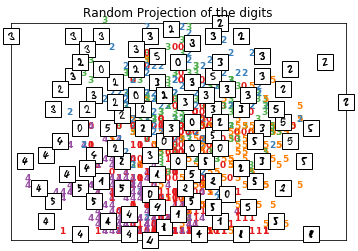

In [5]:


# Random 2D projection using a random unitary matrix
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, "Random Projection of the digits")



Computing Isomap embedding
Done.


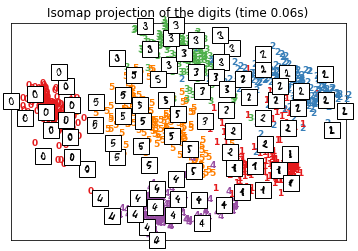

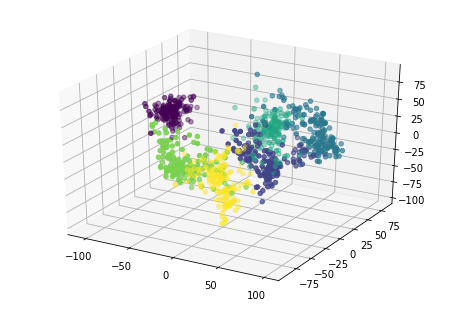

In [12]:


# Isomap projection of the digits dataset
print("Computing Isomap embedding")
t0 = time()
embedding = isomap(input=X, n_neighbors=n_neighbors, n_components=2, n_jobs=4)
print("Done.")
plot_embedding(embedding,"Isomap projection of the digits (time %.2fs)" %(time() - t0))

embedding_three_dim = isomap(input=X, n_neighbors=n_neighbors, n_components=3, n_jobs=4)
# draw 32 plots
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(embedding_three_dim[:, 0], embedding_three_dim[:, 1], embedding_three_dim[:, 2], c=y)



In [7]:
from sklearn.manifold import Isomap
sk_isomap = Isomap(n_neighbors=n_neighbors, n_components=2).fit_transform(X)

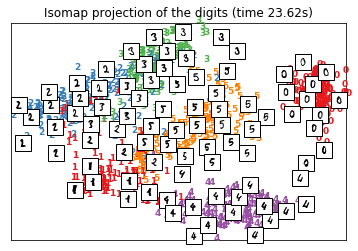

In [11]:
plot_embedding(sk_isomap,"Isomap projection of the digits (time %.2fs)" %(time() - t0))